# Lab 1: Multi-Armed Bandits

### Instructions: **TODO** tags
In this lab session, we will be implementing the multi-armed bandit framework, along with several algorithms studied in the course. This lab aims to understand their differences in design and performance.

Please *read* and *run* the notebook chronologically, and fill in the **TODO**s as you encounter them.
* <span style="color:blue"> Blue **TODOs** </span> means you have to implement the TODOs in the code.
* <span style="color:red"> Red **TODOs** </span> means you have to submit an explanation (of graph/results).

### Libraries
- We will be using [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html), the main library for linear algebra in Python, for virtually all of our mathematical operations in all the labs. It enables efficient operations on arrays of scalars. If you are unfamiliar with numpy, please look into the documentation or tutorials (navigator searches work well!). In this lab, you will for example need to [initialize arrays](https://numpy.org/doc/stable/reference/generated/numpy.full.html) or [generate random numbers](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) from miscellaneous distributions.

- We will be using [matplotlib](https://matplotlib.org/stable/index.html) for plotting. You normally won't need to look into it, but feel free to do so if you need to display fancier graphs.


## 1. Multi-armed Bandit Setting
First we will implement the agent-bandit interactions. <br>
At each step, the *Agent* performs an *action* using its *policy*. This is formalized as the `act` method. <br>
Given said action, the *Bandit* (slot machine) provides a *reward* as feedback. This is formalized as the `pull` method. <br>
The agent *learns* from that feedback (adapts its policy). This is formalized as the `learn` method.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### 1.1. Abstract Agent object
The Agent is `reset` at the start of a run. <br>
During a run, it can `act` to pull a lever, and `learn` from an `action`-`reward` pair.<br>
Please read the doc and function signatures; you don't have to write anything here.

In [2]:
class Bandit_Agent(object):
    """
    Abstract Agent to solve a Bandit problem.

    Contains the methods learn() and act() for the base life cycle of an agent.
    The reset() method reinitializes the agent.
    The minimum requirment to instantiate a child class of Bandit_Agent
    is that it implements the act() method.
    """
    def __init__(self, k:int, **kwargs):
        """
        Simply stores the number of arms of the Bandit problem.
        The __init__() method handles hyperparameters.
        Parameters
        ----------
        k: positive int
            Number of arms of the Bandit problem.
        kwargs: dictionary
            Additional parameters, ignored.
        """
        self.k = k

    def reset(self):
        """
        Reinitializes the agent to 0 knowledge, good as new.

        No inputs or outputs.
        The reset() method handles variables.
        """
        pass

    def learn(self, a:int, r:float):
        """
        Learning method. The agent learns that action a yielded reward r.
        Parameters
        ----------
        a: positive int < k
            Action that yielded the received reward r.
        r: float
            Reward for having performed action a.
        """
        pass

    def act(self) -> int:
        """
        Agent's method to select a lever (or Bandit) to pull.
        Returns
        -------
        a : positive int < k
            The action the agent chose to perform.
        """
        raise NotImplementedError("Calling method act() in Abstract class Bandit_Agent")


### 1.2. <span style="color:blue"> **TODO** </span>: Random Agent
Now we implement the *Random* Agent as a baseline. <br> 
The Random agent does not learn, it picks a random action at all steps. <br>
<span style="color:blue"> **TODO** </span> Implement the  act method of the Random Agent.

In [3]:
class Random_Agent(Bandit_Agent):
    """
    This agent doesn't learn, just acts purely randomly.
    """
    def act(self):
        """
        Random action selection.
        Returns
        -------
        a : positive int < k
            A randomly selected action.
        """
        # TODO, using the numpy random function
        return np.random.randint(self.k)

### 1.3. <span style="color:blue"> **TODO** </span> KBandit object
In this lab our k-armed Bandit is going to be a set of k Gaussian distributions. We select the means from a standard normalized Gaussian N(0,1). Note that in the general case, the distributions of each rewards can be anything and don't have to be within the same distribution family. 

The KBandit (k-armed Bandit) is `reset` at the start of a run. <br>
During a run, the agent chooses a lever, which the bandit `pull`s to output a reward.<br>
Please read the doc and function signatures; you don't have to write anything here.

<span style="color:blue"> **TODO** </span>: fill in the TODOs in the code (1 in `reset` method; 1 in `pull` method).

In [4]:
class KBandit(object):
    """ Set of k Gaussian distributions as reward functions. """
    def __init__(self, k, **kwargs):
        """
        Instantiates the k-armed bandit, with a number of arms, and initializes
        the set of distributions to new standardized Gaussians in a list.
        The reset() method is supposedly called from outside.
        The means are chosen randomly in a standard normalized Gaussian N(0,1).
        Parameters
        ----------
        k: positive int
            Number of arms of the problem.
        """
        self.k = k
        self.reset()

    def reset(self):
        """ Resets each of the k bandits. """
        # TODO: list of k Gaussians, i.e. (mu,std=1) pairs, with mu sampled from N(0,1)
        self.distributions = [(np.random.normal(loc=0, scale=1), 1) for _ in range(self.k)]
        self.best_action = np.argmax([distrib[0] for distrib in self.distributions]) # for plotting purposes

    def pull(self, action:int) -> float:
        """
        Pulls the lever corresponding to the action. 
        In other words, samples a reward from the corresponding distribution.
        Returns the reward.
        Parameters
        ----------
        action: positive int < k
            Lever to pull.
        Returns
        -------
        reward : float
            Reward for pulling this lever.
        """
        # TODO: pull a lever to sample a reward given an action, return the reward.
        return np.random.normal(*self.distributions[action])

### 1.4. <span style="color:blue"> **TODO** </span> Running the Agent-Bandit interactions
Now we can implement the loop of interactions of the Agent with the Bandit.
To visualize our results, we want to store the reward obtained, as well as whether the action performed was optimal.

<span style="color:blue"> **TODO** </span>: fill in the TODOs in the code.

In [5]:
def run_bandit(agent, kbandit, max_steps) -> (np.array, np.array):
    """
    Runs a Bandit problem once. The kbandit and agent are reinitializated,
    then for max_steps, we run the bandit-agent interactions with learning.
    We return the performance of the agent, i.e. the rewards along the way,
    as well as a boolean array of the best action being performed.
    Parameters
    ----------
    agent: Bandit_Agent
        An instance of a Bandit_Agent to solve the problem.
    kbandit: KBandit
        k-armed bandit problem, i.e. k slot machines with a reward distribution.
    max_steps: positive int
        Number of steps to run the problem.
    Returns
    -------
    perf, best_action : np.array, np.array
        Arrays of size max_steps containing all
            - perf: rewards obtained by the agent during the run.
            - best_action: boolean array, whether the agent did the best action.
    """
    # TODO: prepare the agent and bandit for the run.
    perf = np.empty(max_steps)
    best_action = np.empty(max_steps)
    kbandit.reset()
    agent.reset()
    for step in range(max_steps):
        # TODO: agent acts
        action = agent.act() 
        # TODO: pull an arm of the bandit
        reward = kbandit.pull(action) 
        # TODO: learn that this action gave this reward
        agent.learn(action, reward)

        # Plotting. Nothing to do here.
        perf[step] = reward
        best_action[step] = int(action == kbandit.best_action)

    return perf, best_action

### 1.5. Plotting the results: Random Agent performance
Since these experiments involve a lot of stochasticity, we do multiple runs in order to extract average behavior.<br>
**Run** the following cells to visualize the Random agent performance. <br>
You don't have anything to write in the next code cells. Please do read through them to understand what we're doing.<br>

In [6]:
def run_multiple_bandits(n_runs, **kwargs) -> (np.array, np.array):
    """
    Runs multiple independent bandit problems; outputs the mean of the results.
    Parameters
    ----------
    agent, kbandit, n_runs: see run_bandit
        See function run_bandit
    Returns
    -------
    ret : expected_type
        description
    """
    perfs = []
    best_actions = []
    for run in range(n_runs):
        perf, best_action = run_bandit(**kwargs)
        perfs.append(perf)
        best_actions.append(best_action)

    return np.mean(perfs,axis=0), np.mean(best_actions,axis=0)

In [7]:
def make_plot(l, suptitle, title, xlabel, ylabel,
              labels=None, interval_yaxis=None):
    """ Simply saves a plot with multiple usual arguments."""
    if labels is None:
        plt.plot(l)
    else:
        for perf, label in zip(l, labels):
            plt.plot(perf, label=label)
        plt.legend()

    plt.suptitle(suptitle, fontsize=14, fontweight='bold')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if interval_yaxis is not None:
        new_y1, new_y2 = interval_yaxis
        x1,x2,y1,y2 = plt.axis()
        plt.axis((x1,x2,new_y1,new_y2))

    plt.plot()
    plt.show()
    
def action_plot(l, suptitle, title, labels=None):
    make_plot(l, suptitle, title, 'Steps', 'Best action proportion', labels, interval_yaxis=[0,1])

def perf_plot(l, suptitle, title, labels=None):
    make_plot(l, suptitle, title, 'Steps', 'Average Reward', labels, interval_yaxis=None)

def dict_string(d):
    """ Turns a dictionary to a single readable string """
    s = ""
    for key, value in d.items():
        s += "{}:{}, ".format(key, value)
    return s[:-2] # erase final comma and space

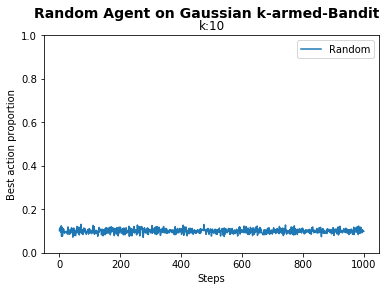

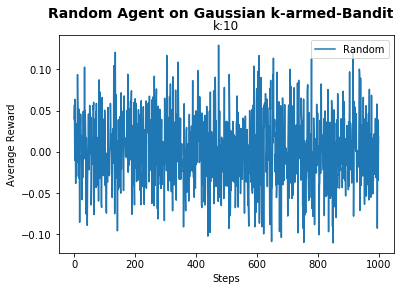

In [8]:
## HYPERPARAMETERS AND AGENTS ==================================================
config = {
    'k': 10
}

n_runs = 1000
max_steps = 1000 # time budget per run
agent = Random_Agent(**config)
kbandit = KBandit(**config)

perfs, best_actions = run_multiple_bandits(n_runs, agent=agent, kbandit=kbandit, max_steps=max_steps)
labels = ['Random']
suptitle = 'Random Agent on Gaussian k-armed-Bandit'
title = dict_string(config)

action_plot ([best_actions], suptitle, title, labels)
perf_plot   ([perfs],  suptitle, title, labels)

### 1.6. <span style="color:red"> **TODO** </span> Please explain your results in a paragraph in this cell.

Because we run a random agent, the agent doesn't learn from his past and will generate his rewards based upon a random picked mean around 0, and a standard diviation of 1. In the first plot, we don't see the agent learn anything, and in the second plot we can see the reward stays almost the same during the run. 

## 2. Bandit Algorithms
Now we are going to implement learning Agents in order to select the best action/lever/arm to pull to maximize the obtained reward.

### 2.1. <span style="color:blue"> **TODO** </span> Epsilon-Greedy, Sample Average

In [9]:
class EpsGreedy_SampleAverage(Bandit_Agent):
    # TODO: implement this class following the Agent formalism above.
    # This class uses Sample Averages to estimate q; others are non stationary.
    
    def __init__(self, eps, **kwargs):
        super().__init__(**kwargs)
        self.eps = eps
        self.reset()
    
    def reset(self):
        self.means = [0] * self.k
        self.n = [0] * self.k
    
    def act(self):
        rand = np.random.random_sample()
        if rand >= self.eps:
            action = np.argmax([mean for mean in self.means])
        else:
            action = np.random.randint(self.k)
        return action
        
    def learn(self, a, r):
        self.n[a] += 1
        self.means[a] += 1 / self.n[a] * (r - self.means[a])
    
    

### 2.2. <span style="color:blue"> **TODO** </span> Epsilon-Greedy, Weighted Average
Please use `lr` for the learning rate; it is passed as input to the `__init__` method.

In [10]:
class EpsGreedy_WeightedAverage(EpsGreedy_SampleAverage):
    # TODO: implement this class following the formalism above.
    # Non stationary agent with q estimating and eps-greedy action selection.
    
    # PLEASE USE THE LR HYPERPARAMETER FOR THE LEARNING RATE
    def __init__(self, lr, **kwargs):
        super().__init__(**kwargs)
        self.alpha = lr
    
    def learn(self, a, r):
        self.means[a] += self.alpha * (r - self.means[a])

### 2.3. <span style="color:blue"> **TODO** </span> Optimistic Greedy

In [11]:
class OptimisticGreedy(EpsGreedy_WeightedAverage):
    # TODO: implement this class following the formalism above.
    # Same as above but with optimistic starting values.
    def __init__(self, q0, **kwargs):
        self.q0 = q0
        super().__init__(**kwargs)
    
    def reset(self):
        self.means = [self.q0] * self.k

### 2.4. <span style="color:blue"> **TODO** </span> UCB
UCB works with either Sample or Weighted Averages. Please use Weighted Averages. Please use `lr` for the learning rate; it is passed as input to the `__init__` method.

In [12]:
class UCB(Bandit_Agent):
    # TODO: implement this class following the formalism above.
    
    # PLEASE USE THE LR HYPERPARAMETER FOR THE LEARNING RATE
    def __init__(self, c, lr, **kwargs):
        super().__init__(**kwargs)
        self.c = c
        self.alpha = lr

    def reset(self):
        self.means = [0] * self.k
        self.N = [0] * self.k
        self.time = 0

    def act(self):
        if self.time < self.k:
            action = self.time
        else:
            action = np.argmax([(mean + self.c * np.sqrt(np.log(self.time) / n)) for mean, n in zip(self.means, self.N)])
        self.N[action] += 1
        self.time += 1
        return action

    def learn(self, a, r):
        self.means[a] += self.alpha * (r - self.means[a])

### 2.5. <span style="color:blue"> **TODO** </span> Gradient Bandit
Please use `alpha` for the learning rate; it is passed as input to the `__init__` method.

In [13]:
# You don't have anything to do in this cell. These methods will be helpful for the Gradient Bandit Agent.
def softmax(x):
    """ Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def my_random_choice(v, p=None):
    """ Faster version of the np.random.choice function with probabilities """
    if p is None:
        return v[np.random.randint(len(v))]
    # else (general case)
    assert (abs(sum(p)-1.)<1e-6), "Invalid probability vector p, sum={}".format(sum(p))
    r = np.random.rand()
    i = 0
    s = p[i]
    while s < r:
        i += 1
        s += p[i]

    if type(v) is int:
        assert len(p) == v, "Int doesn't match proba length: {} != {}".format(v, len(p))
        return i
    else:
        assert len(v) == len(p), "Incorrect entry lengths v,p: {} != {}".format(len(v), len(p))
        return v[i]

In [14]:
class Gradient_Bandit(Bandit_Agent):
    # TODO: implement this class following the formalism above.
    # If you want this to run fast, use the my_random_choice function defined above,
    # instead of np.random.choice to sample from the softmax.
    # You can also find the softmax function above.
    
    # PLEASE USE THE ALPHA HYPERPARAMETER FOR THE LEARNING RATE
    def __init__(self, alpha, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha
        self.reset()

    def reset(self):
        self.H = [0] * self.k
        self.time = 0
        self.mean_r = 0
        self.probs= [0] * self.k

    def act(self):
        self.probs = softmax(self.H)
        return my_random_choice(len(self.H), self.probs)

    def learn(self, a, r):
        self.time += 1
        self.mean_r += (r - self.mean_r) / self.time

        for i in range(len(self.H)):
            if i == a:
                self.H[i] += self.alpha * (r - self.mean_r) * (1 - self.probs[i])
            else:
                self.H[i] -= self.alpha * (r - self.mean_r) * self.probs[i]


### 2.5. Plotting the results: All Agent performances.
We now compare all agents.
**Run** the following cells to visualize all the Agents' performances at once. <br>
You don't have anything to write in the next code cells. Please do read through them to understand what we're doing.<br>

*If don't want to test all agents at once during your implementation, comment out the rest from the list of `agents`.* <br> 
**You have to submit the combined plot with all the Agents; please don't make us run it.**

In [15]:
def run_multiple_agents(agents, **kwargs):
    """
    Launches run_multiple_bandits for a list of agents.
    Outputs a list of the returns.
    Parameters
    ----------
    agents : list of agents
        instantiated agents on which to perform the runs on.
    **kwargs: dictionary
        Inputs for the function run_multiple_bandits
    Returns
    -------
    ret : list
        list of the outputs from the run_multiple_bandits function for each
        agent from the agents list.
    """
    perfs = []
    best_actions = []
    for agent in agents:
        print(agent.__class__.__name__)
        kwargs['agent'] = agent
        perf, best_action = run_multiple_bandits(**kwargs)
        perfs.append(perf)
        best_actions.append(best_action)

    return perfs, best_actions

Random_Agent
EpsGreedy_WeightedAverage
EpsGreedy_SampleAverage
OptimisticGreedy
Gradient_Bandit
UCB


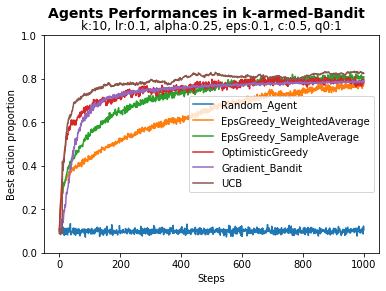

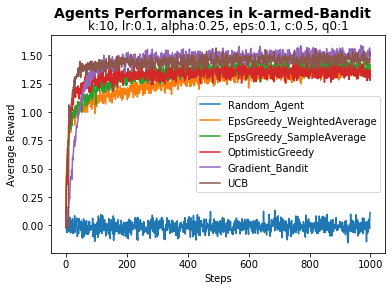

In [16]:
## HYPERPARAMETERS AND AGENTS ==================================================
config = {
    'k': 10,
    'lr': 0.1,
    'alpha': 0.25,
    'eps': 0.1,
    'c': 0.5,
    'q0': 1
}

n_runs = 1000
max_steps = 1000 # time budget per run
agents = [
    Random_Agent(**config),
    EpsGreedy_WeightedAverage(**config),
    EpsGreedy_SampleAverage(**config),
    OptimisticGreedy(**config),
    Gradient_Bandit(**config),
    UCB(**config)
]

kbandit = KBandit(**config)

perfs, best_actions = run_multiple_agents(agents=agents, n_runs=n_runs, kbandit=kbandit, max_steps=max_steps)
labels = [agent.__class__.__name__ for agent in agents]
suptitle = 'Agents Performances in k-armed-Bandit'
title = dict_string(config)

action_plot (best_actions, suptitle, title, labels)
perf_plot   (perfs,  suptitle, title, labels)

### <span style="color:red"> **TODO** </span> Please explain your results in a paragraph in this cell.

In blue we can still see the random agent from earlier, but we can also see the other agents performing way better. Every other agent learned from their past rewards and tried to increase the next reward. 
In the first plot, we can see that Epsilon greedy with weighted average learns the slowest, and this is also represented in the bottom plot, where the average reward starts out lower. We can also see that UCB performs the best, but some of the others are very close behind. Near the end, the rewards for UCB and gradient bandit are almost the same. 

## 2. Varied Bandit distributions
So far, we have worked with a bandit of k Normal Gaussian distributions. However, in the general case, the reward distributions for each arm could be anything, and certainly do not need to be so well-behaved. For example, an arm triggering the roll of a dice would mean a uniform discrete distribution. Medical treatments results can often be interpreted as Bernouilli distribution outputs (success with some probability). Taking a single individual from a set of multiple populations can be associatedwith sampling from a Gaussian mixture. Playing an actual slot machine would mean a high probability for small negative reward (cost of playing), and rare high rewards with the right symbols combination, resulting in a particular discrete distribution.

Can our algorithms still adapt to these wilder distributions? Let's try it out! 

### 2.1. <span style="color:blue"> **TODO** </span> VariedKBandit

We now want to implement a Bandit with 10 amrs still, but with a range of distributions to sample from. Let's pick 5 interesting distributions:

1. **Dice roll**. reward: roll of a dice
2. **Medical treatment**. reward: success of a treatment with success rate p=0.15. Success gives a reward of 10.
3. **Slot machine**. reward: gain for a slot machine with playing cost of 1€, 10% probability to win 10€, and 1% probability to win 100€.
4. **Goals in a Football match**. reward: [number of goals in a World Cup football match](https://en.wikipedia.org/wiki/Poisson_distribution#Examples_of_probability_for_Poisson_distributions).
5. **Human height**. reward: [height](https://en.wikipedia.org/wiki/Average_human_height_by_country), in meters, of a random man taken from the joint populations of the Netherlands and Philipines. Assume Gaussian distributions with standard deviations of [8cm](https://danielmiessler.com/blog/standard-deviations-explained); don't forget relative population sizes!


In [27]:
class VariedKBandit(object):
    """ Set of k=5 distributions as written above. """
    def __init__(self, **kwargs):
        self.k = 5
        self.reset()
        

    def reset(self):
        """ Resets each of the k bandits. """
        # TODO
        self.distributions = [
        lambda : np.random.randint(1, 7),
        lambda : np.random.choice([0, 10], p=[0.85, 0.15]),
        lambda : np.random.choice([-1, 9, 99], p=[0.89, 0.1, 0.01]),
        lambda : np.random.poisson(2.5),
        lambda : np.random.normal(np.random.choice([180.8, 163.5], p=[1/(106651394/17469635), 1-1/(106651394/17469635)]), 0.8)
        ]  
        self.best_action = np.argmax([distrib() for distrib in self.distributions])
        
        
        
    def pull(self, action:int) -> float:
        """
        Pulls the lever corresponding to the action.
        In other words, samples a reward from the corresponding distribution.
        Returns the reward.
        Parameters
        ----------
        action: positive int < k
            Lever to pull.
        Returns
        -------
        reward : float
            Reward for pulling this lever.
        """
        
        # TODO: pull a lever to sample a reward given an action, return the reward.
        return self.distributions[action]()
        

### 2.1. Plotting the results

Random_Agent
EpsGreedy_WeightedAverage
EpsGreedy_SampleAverage
OptimisticGreedy
Gradient_Bandit
UCB


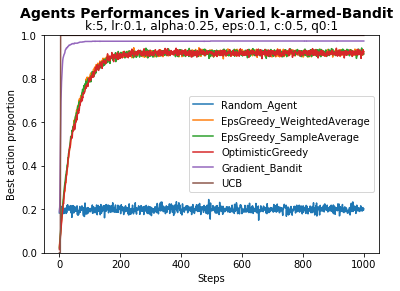

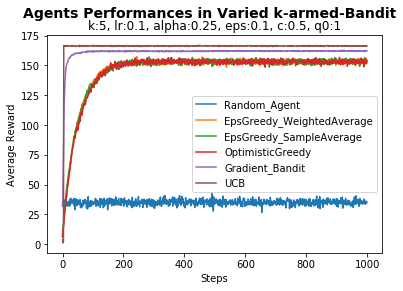

In [28]:
## HYPERPARAMETERS AND AGENTS ==================================================
config = {
    'k': 5,
    'lr': 0.1,
    'alpha': 0.25,
    'eps': 0.1,
    'c': 0.5,
    'q0': 1
}

n_runs = 1000
max_steps = 1000 # time budget per run
agents = [
    Random_Agent(**config),
    EpsGreedy_WeightedAverage(**config),
    EpsGreedy_SampleAverage(**config),
    OptimisticGreedy(**config),
    Gradient_Bandit(**config),
    UCB(**config)
]

kbandit = VariedKBandit(**config)

perfs, best_actions = run_multiple_agents(agents=agents, n_runs=n_runs, kbandit=kbandit, max_steps=max_steps)
labels = [agent.__class__.__name__ for agent in agents]
suptitle = 'Agents Performances in Varied k-armed-Bandit'
title = dict_string(config)

action_plot (best_actions, suptitle, title, labels)
perf_plot   (perfs,  suptitle, title, labels)

### <span style="color:red"> **TODO** </span> Please explain your results in a paragraph in this cell.
*Try to play with the hyperparameters (in `config`) to build intuition on how the algorithms work. You can decrease `n_runs` above so it runs a bit faster, but the results will be noisier. Please submit a complete unaltered run at the end.*

As expected, the random agent will still be the worst and pick a random bandit. We now see that the epsilon greedy algotithms all follow the same graph. The Gradient bandit is better, but the UCB will still be the best. An interesting thing about the UCB is that it will directly pick the most optimal bandit and has directly the best reward. After the first iteration we don't see it increasing further. 